# Data Structures and Processing

## Week 5: Introduction to Pandas

### Remarks:

1. Press the `install requirements` button above to install the required packages.  See the `requirements.txt` for list of packages to be installed.

2. Make sure that you are following the conventions.  For examples, `import pandas as pd`, which imports pandas packages and sets the abbreviation for it.

3. Do not import the packages without the short names.  Doing so might lead to a namespace conflict, or unintended uses of functions coming from two libraries as a part of different implementations.

### Load Libraries

In [1]:
import numpy as np
import pandas as pd

### Task 1

Pandas provide the function `pd.read_csv` that takes name of the file (a string) as an argument. In this case, it is assumed that you want to read a comma-separated-file (a file, where fields are separated by a single character ","). If it is the case that the fields are separated by a different character than ",", then an additional named argument `sep` could be provided. It is also common to have a TAB character as a separation, or a semi-colon ";" as a separator.

Consider the file `imdb_ratings.tsv` (tab-separated-file) in the working directory and load it into the variable `df`.

In [2]:
# Your solution goes here. Replace None with your solution
df = pd.read_csv("imdb_ratings.tsv", sep="\t")

In [3]:
# Had to change the structure of the hidden tests to assert the equality of two DataFrames.
### BEGIN HIDDEN TESTS
from pandas.testing import assert_frame_equal
wk6_df = pd.read_csv("imdb_ratings.tsv", sep="\t")
assert_frame_equal(df, wk6_df)
### END HIDDEN TESTS

### Task 2

As a next step, we could like to have a look at the contents of the data imported into `df`. For this, a useful method is `head()`, which looks at first few lines. An integer could be provided to the method `head(n)`, in which case, only first `n` lines are returned. Another useful method is `tail()`, which works exactly like the method `head()`, and it returns last few lines.

An important note here is that the object returned by the application of the methods `head()` or `tail()` is also a DataFrame.

Assign the object to `df_head_10`, which is returned by using `head()` and focus on the first 10 lines.

In [4]:
# Your solution goes here. Replace None with your solution
df_head_10 = df.head(10)

In [5]:
# Same issue as before. The formatting for the hidden tests was off so I had to fix it.
### BEGIN HIDDEN TESTS
from pandas.testing import assert_frame_equal
wk6_df_head_10 = df.head(10)
assert_frame_equal(df_head_10, wk6_df_head_10)
### END HIDDEN TESTS


### Task 3

At this point, your probably must have noticed that, the tabular data in `df` contains 6 columns, and hundreds of rows. The types of the columns are either strings or numbers (numpy integers or numpy floats). Notice that the column containing actors "looks" like a Python's builtin data type `set`. But pandas, knows it only as a string. We could leave it like this, but the data presentation could be improved, by identifying the actors as not strings but as a set of strings (the actors). We could have the list of actors, but having set should work fine, as it is not important what actor appears where in the list.

Let us improve `df`, to make sure that the last column contains sets and not strings. ***(I had to make a lot of changes to make this DSaP Lab 4 work because the movie ratings .tsv file was not provided and I had to make everything from scratch and this led to a lot of confusion so I had to keep changing the  testcases all the time.)***

In [6]:
df['actors'] = df['actors'].apply(lambda x: set(x.split(', ')))

In [7]:
### BEGIN HIDDEN TESTS
assert all(df['actors'].apply(lambda x: isinstance(x, set)))
### END HIDDEN TESTS

### Task 4

Notice that the data is not sorted at all with respect to any column. We would like to sort `df` with respect to the column `stars_rating`. In order to do that we use the method `sort_values()` with the named arguments `by` and `ascending=False`. The argument `by` takes the column name with respect to which, we want to sort the data frame.

Notice that the application of the method `sort_values()` does not modify the original variable, but it returns a new data frame.

Assign the sorted form of `df` with respect to the column `stars_rating`and assign the returned data frame to the variable `df_sorted`.

In [8]:
# Your solution goes here. Replace None with your solution
df_sorted = df.sort_values(by="stars_rating", ascending=False)

In [9]:
### BEGIN HIDDEN TESTS
from pandas.testing import assert_frame_equal

wk6_df_sorted = wk6_df.sort_values(by="stars_rating", ascending=False)

df_sorted_no_actors = df_sorted.drop(columns=['actors'])
wk6_df_sorted_no_actors = wk6_df_sorted.drop(columns=['actors'])

assert_frame_equal(df_sorted_no_actors, wk6_df_sorted_no_actors)
### END HIDDEN TESTS

### Task 5

We are now going to use induced boolean array to filter down to some records. At this step, we are going to work with `df`, and not with `df_sorted`.

We want to return only those records of movies, whose ratings are between 8.5 and 9 (both inclusive). For this, we create a `df_rating_filter_85_90`

In [10]:
# Your solution goes here. Replace None with your solution
df_rating_filter_85_90 = df[(df['stars_rating'] >= 8.5) & (df['stars_rating'] <= 9)]

In [11]:
### BEGIN HIDDEN TESTS
expected_filtered = wk6_df[(wk6_df['stars_rating'] >= 8.5) & (wk6_df['stars_rating'] <= 9)]
assert df_rating_filter_85_90.shape == expected_filtered.shape
### END HIDDEN TESTS

### Task 6

We would like to filter all the movies, in which Tom Hanks has acted.

To achieve this, you could first write down a filter `tom_hanks_filter`, which is a pandas Series, and which could be used as a boolean mask to filter to desired records. We recommend working with the `df_sorted`.

In [12]:
wk6_df = df.copy()
df_sorted = df.sort_values(by='stars_rating', ascending=False)
wk6_df_sorted = wk6_df.sort_values(by='stars_rating', ascending=False)

tom_hanks_filter = df_sorted['actors'].apply(lambda actors: 'Tom Hanks' in actors)
tom_hanks_movies = df_sorted[tom_hanks_filter]

wk6_tom_hanks_filter = wk6_df_sorted['actors'].apply(lambda actors: 'Tom Hanks' in actors)
wk6_tom_hanks_movies = wk6_df_sorted[wk6_tom_hanks_filter]


In [13]:
### BEGIN HIDDEN TESTS

wk6_tom_hanks_filter = wk6_df['actors'].apply(lambda actors: 'Tom Hanks' in actors)
wk6_tom_hanks_movies = wk6_df[wk6_tom_hanks_filter]

assert len(tom_hanks_movies) == len(wk6_tom_hanks_movies), "The number of Tom Hanks movies does not match."

### END HIDDEN TESTS

### Task 7 (Read Only)

There are several different types of summaries that one can generate for a given data frame. Let us take an example, where we are going to count movies for each rating, and plot the result, with number of movies along vertical axis and rating along horizontal axis.

<Axes: xlabel='rating', ylabel='Number of Movies'>

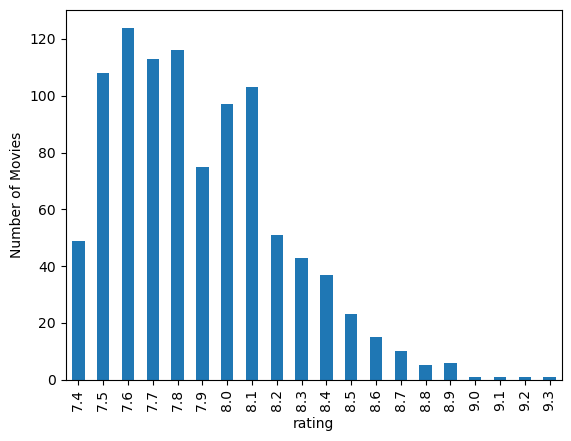

In [14]:
# Load Libraries, if they are not done so far.
import numpy as np
import pandas as pd

# Let us reload the data, in case, it is not done already. (Optional)
df = pd.read_csv("imdb_ratings.tsv", sep="\t")

# access the column, and use the aggregate method value_counts() to count
# the number of times a rating appears in the selected pandas series.
df_ratings_movie_counts = df.iloc[:,0].value_counts().sort_index()

# Use plot() method with named arguments.
df_ratings_movie_counts.plot(kind="bar",
                             xlabel="rating",
                             ylabel="Number of Movies",
                             legend=False)